In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2

import os
import io
import sys
import ast
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mlpremier.cnn.preprocess import generate_cnn_data, split_preprocess_cnn_data, preprocess_cnn_data
from mlpremier.cnn.model import build_train_cnn, full_cnn_pipeline
from mlpremier.cnn.evaluate import gridsearch_analysis
import tensorflow as tf
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


from config import STANDARD_CAT_FEATURES, STANDARD_NUM_FEATURES, NUM_FEATURES_DICT


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22'], Position: GK =======
Dropping Players with Avg. Playtime < 1e-06...

Total players of type GK = 163.
82 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (2502, 7).
Generated combined features dataframe for preprocessing of shape: (2988, 11).

========== EDA ==========
Selected Statistics:
      total_points  ict_index  clean_sheets  goals_conceded        bps  \
mean      1.871821   1.175234      0.145917        0.701138   9.402945   
min      -2.000000   0.000000      0.000000        0.000000   0.000000   
max      15.000000   8.100000      1.000000        9.000000  51.000000   
std       2.732090   1.536084      0.353082        1.149972  10.620628   

      matchup_difficulty  goals_scored   assists  yellow_cards  red_cards  
mean           -0.032798      0.000335  0.001673      0.022423   0.000669  
min            -3.000000      0.000000  0.000000      0.000000   0.000000  
max 

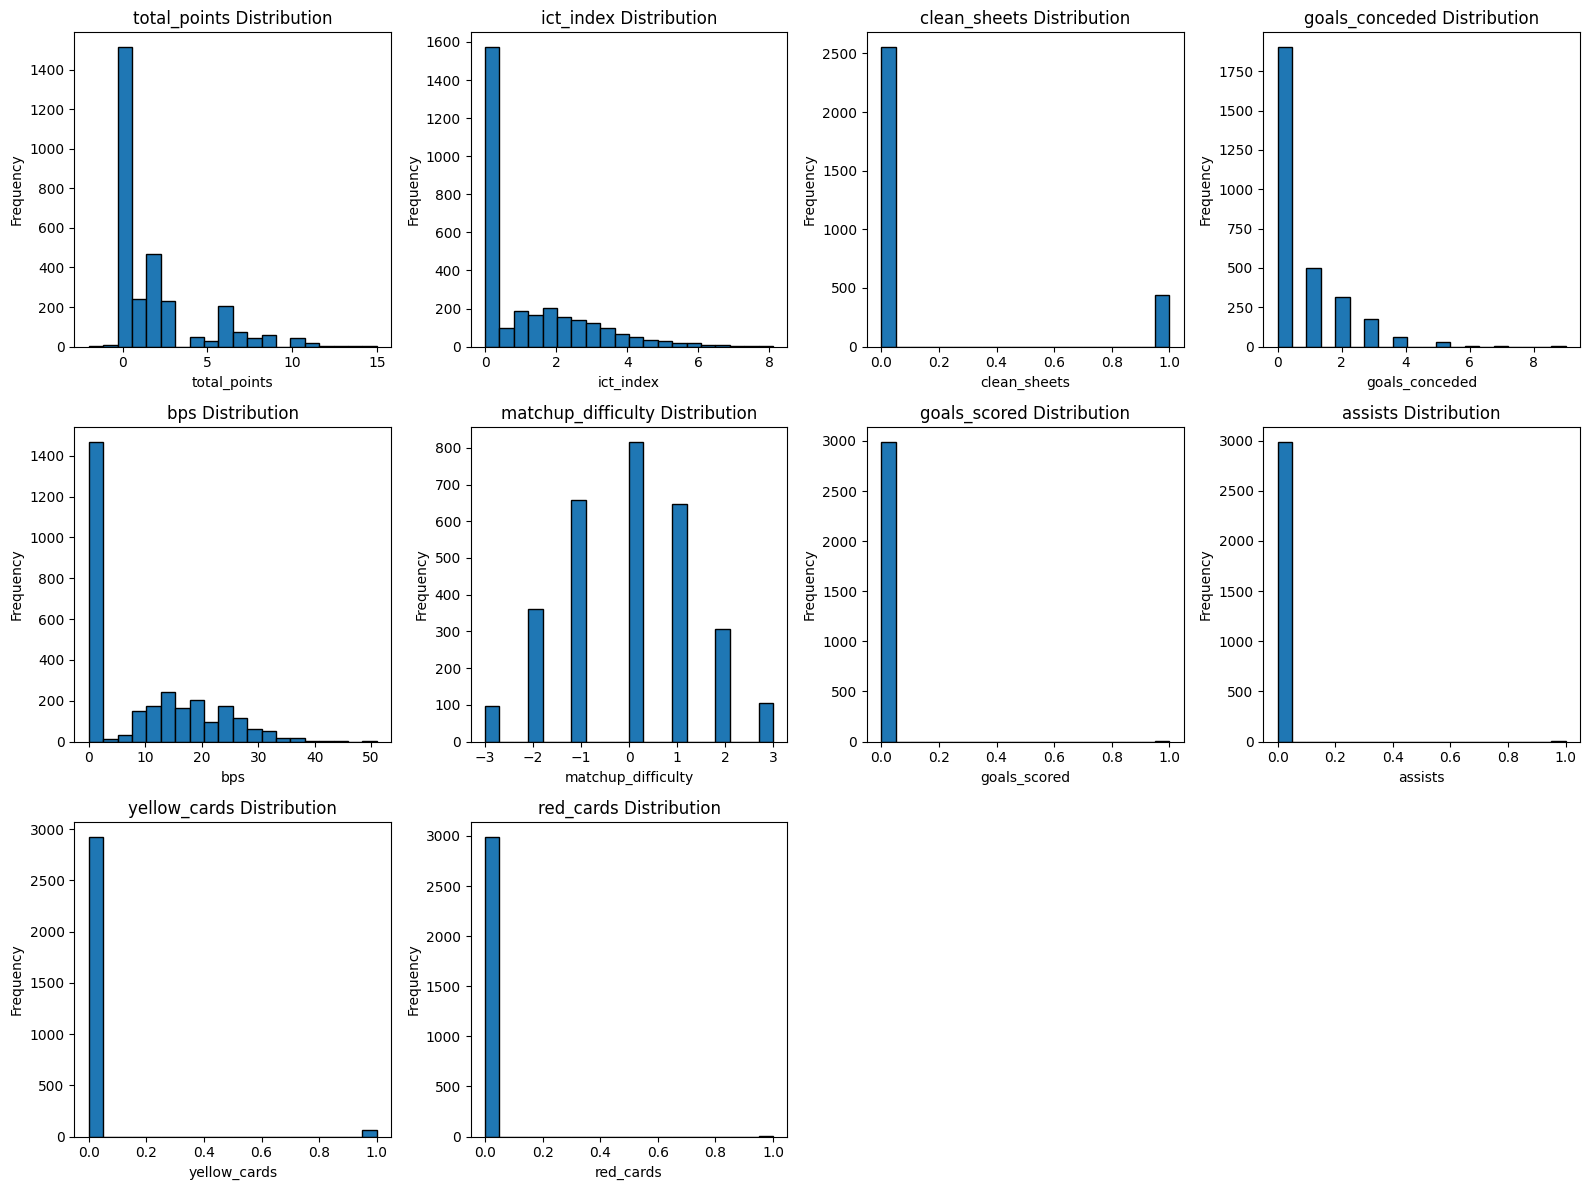

========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

=== Stratifying Split by : Stdev ===
Shape of windowed_df: (2502, 7)
Shape of a given window (prior to preprocessing): (6, 11)
stdev Distribution of Players:



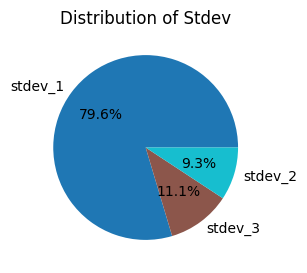

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[ 1.94211124e+00  1.28342792e+00  1.45289444e-01  7.49148695e-01
  9.96594779e+00 -1.87854711e-01  0.00000000e+00  1.70261067e-03
  2.66742338e-02  1.13507378e-03]

Standard Deviation of Standard Scaler:
[ 2.73976222  1.60627602  0.35239243  1.15661345 10.75598603  1.34612153
  1.          0.04122756  0.16112951  0.03367173]
Transforming features using StandardScaler + OHE Pipeline.
========== Done Preprocessing CNN Data ==========

========== Done Splitting CNN Data ==========

====== Building CNN Architecture ======
(None, 320)
(None, 1)
(None, 321)
====== Done Building CNN Architecture ======


c:\Users\Dean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_30', 'keras_tensor_33']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Epoch 74: early stopping
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Loss (MSE): 7.220558166503906, Test Mean Absolute Error (MAE): 1.7077786922454834, Test Spearman Correlation: 0.6520165205001831


c:\Users\Dean\Code\csci-567\ml-premier-predictor\mlpremier\cnn\..\..\mlpremier\cnn\evaluate.py:148: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


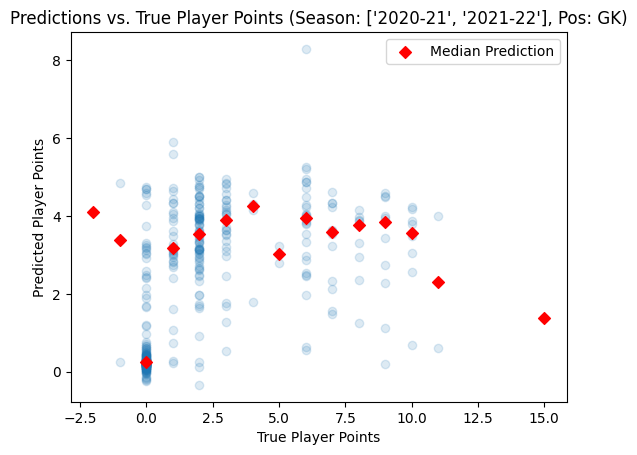

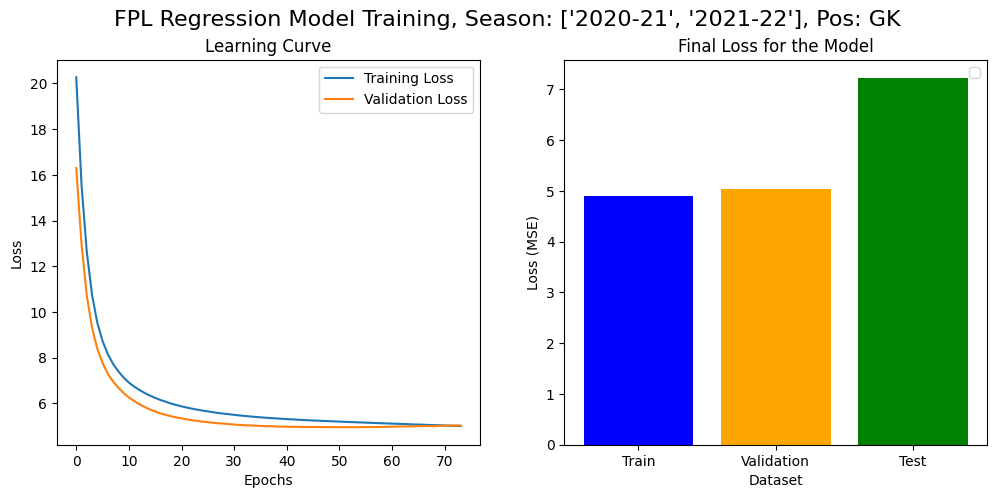

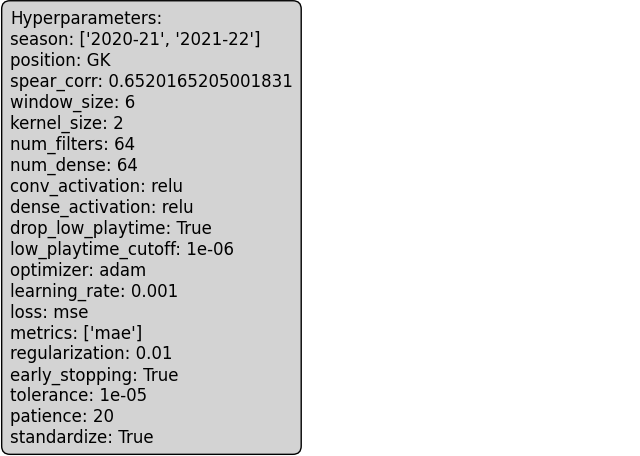

(<Functional name=functional_3, built=True>,
 {'season': ['2020-21', '2021-22'],
  'position': 'GK',
  'train_mse': 4.8882856369018555,
  'train_mae': 1.3672508001327515,
  'val_mse': 5.030869483947754,
  'val_mae': 1.3610657453536987,
  'test_mse': 7.220558166503906,
  'test_mae': 1.7077786922454834,
  'spear_corr': 0.6520165205001831,
  'window_size': 6,
  'kernel_size': 2,
  'num_filters': 64,
  'num_dense': 64,
  'conv_activation': 'relu',
  'dense_activation': 'relu',
  'drop_low_playtime': True,
  'low_playtime_cutoff': 1e-06,
  'optimizer': 'adam',
  'learning_rate': 0.001,
  'loss': 'mse',
  'metrics': ['mae'],
  'regularization': 0.01,
  'early_stopping': True,
  'tolerance': 1e-05,
  'patience': 20,
  'standardize': True})

In [ ]:
#SEED = 229

#random.seed(SEED)
#tf.random.set_seed(SEED)
#np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

full_cnn_pipeline(DATA_DIR,
                season = ['2020-21', '2021-22'], 
                position = 'FWD', 
                window_size=6,
                kernel_size=2,
                num_filters=64,
                num_dense=64,
                batch_size = 32,
                epochs = 1000,  
                drop_low_playtime = True,
                low_playtime_cutoff = 1e-6,
                num_features = ['total_points', 'ict_index', 'clean_sheets', 'goals_conceded', 'bps', 'matchup_difficulty', 'goals_scored', 'assists', 'yellow_cards', 'red_cards'],
                cat_features = STANDARD_CAT_FEATURES, 
                stratify_by = 'stdev', 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.01, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                draw_model = False,
                standardize= True,)

# GridSearch for Best Model

In [53]:
from mlpremier.cnn.experiment import gridsearch_cnn

#gridsearch_cnn(epochs=100, verbose=False)

#PERFORMING VIA COMMAND LINE SCRIPT NOW FOR EFFICIENCY

## Investigate GridSearch Results

## Learning Curve, Filter Investigation

In [54]:
def investigate_model(expt_name: str = 'gridsearch', 
                      drop_low_playtime: bool = True,
                      **kwargs):
    """
    Investigate the best model for the given experiment and drop status.

    Retrains the model on the same exact data split (to avoid data leakage), and
    generates learning curves.
    """
    season =  "['2020-21', '2021-22']"
    best_params = gridsearch_analysis(expt_name, 
                        season=season, 
                        eval_top=1,
                        drop_low_playtime=drop_low_playtime,
                        **kwargs)
    
    POSITIONS = ['GK', 'DEF', 'MID', 'FWD']
    best_models = {}
    for position in POSITIONS: 

        print(f"\n======= Retraining and Filter Analysis for {position} model: =======\n")
        # Clean up and consolidate parameters in the 'params' dictionary
        params = best_params.loc[position, :].to_dict()

        serialized_dataset = params.pop('dataset')
        dataset = pickle.loads(ast.literal_eval(serialized_dataset))

        # Retrieve individual datasets
        X_train = dataset['X_train']
        d_train = dataset['d_train']
        y_train = dataset['y_train']
        X_val = dataset['X_val']
        d_val = dataset['d_val']
        y_val = dataset['y_val']
        X_test = dataset['X_test']
        d_test = dataset['d_test']
        y_test = dataset['y_test']

        serialized_pipeline = params.pop('pipeline')
        pipeline = pickle.loads(ast.literal_eval(serialized_pipeline))

        params['season'] = ['2020-21', '2021-22']
        params['metrics'] = ['mae']
        params['num_features'] = NUM_FEATURES_DICT[params['position']][params.pop('amt_num_features')]
        params.pop('stratify_by')  #don't need this, we have the pickled split data 

        # Add the datasets to params
        params.update({
            'X_train': X_train,
            'd_train': d_train,
            'y_train': y_train,
            'X_val': X_val,
            'd_val': d_val,
            'y_val': y_val,
            'X_test': X_test,
            'd_test': d_test,
            'y_test': y_test,
            'plot': True,
        })

        # =========== Qualitative Analysis of Best & Worst Ex =============

        print(f"X_train shape: {X_train.shape}")
        print(f"X_val shape: {X_val.shape}")
        print(f"X_test shape: {X_test.shape}")

        model, expt_res = build_train_cnn(**params)
        best_models[position] = model

        y_pred = model.predict([X_test, d_test])
        y_test_flattened = y_test.flatten()
        y_pred_flattened = y_pred.flatten()
        mse_per_example = np.square(y_test_flattened - y_pred_flattened)

        results_df = pd.DataFrame({'Actual Score': y_test_flattened, 'Predicted Score': y_pred_flattened, 'MSE': mse_per_example})
        results_df['d_test'] = d_test

        # Add X_test features to the DataFrame
        # unstandardize the features
        X_test_original = X_test.copy()

        # Calculate unstandardized pts
        numerical_transformer = pipeline.named_steps['preprocessor'].named_transformers_['num']
        X_test_reshaped = X_test_original.reshape(-1, X_test_original.shape[-1])
        X_test_unstandardized = numerical_transformer.inverse_transform(X_test_reshaped).astype(int)
        X_test_unstandardized = X_test_unstandardized.reshape(X_test_original.shape)
        X_test_unstandardized_2d = X_test_unstandardized.reshape(X_test_unstandardized.shape[0], -1)
        column_names = [f'pts_week{i}' for i in range(X_test_unstandardized_2d.shape[1])]
        unstandardized_df = pd.DataFrame(X_test_unstandardized_2d, columns=column_names)

        results_df = pd.concat([results_df, unstandardized_df], axis=1)

        results_df.sort_values(by='MSE', ascending=False, inplace=True)

        print(f"\nWorst two examples for {position}:\n")
        display(results_df.head(2))

        print(f"\nBest two examples for {position}:\n")
        display(results_df.tail(2))


        for layer in model.layers:
            if 'conv' not in layer.name:
                continue
            filters, biases = layer.get_weights()

        # retrieve filter weights from the second hidden layer
        filters, biases = model.layers[1].get_weights()

        # normalize filter values by z-score normalization
        mean_value, std_dev = filters.mean(), filters.std()
        normalized_filters = (filters - mean_value) / std_dev
        mean_filter = normalized_filters.mean(axis=-1)

        # set greyscale color map
        cmap = plt.cm.Greys_r
        cmap.set_bad('0.5')  # Set the color for NaN values (if any) to medium-grey

        # plot the normalized average filter with numeric values inside pixels
        fig, ax = plt.subplots()
        img = ax.imshow(mean_filter, cmap=cmap, vmin=-1, vmax=1)

        # add text annotations with normalized values inside each pixel
        for i, value in enumerate(mean_filter):
            value = value[0]
            # set text color based on brightness
            text_color = 'white' if value < 0 else 'black'
            ax.text(0, i, f"{value:.4f}", ha='center', va='center', fontsize=8, color=text_color)
        ax.set_title(f"Averaged 1D Convolution Filter (Normalized) — {position}")
        ax.axis('off')
        plt.show()

    return best_models


# V12 (overfits)

In [78]:
#best_models = investigate_model('gridsearch_v12', drop_low_playtime=True, stratify_by='stdev')

## V11 (stratified by stdev score)

### Drop Model

In [56]:
# model with drop benched players
#best_models = investigate_model('gridsearch_v11', drop_low_playtime=True, stratify_by='stdev')

### Easy Model (Full Data)

In [57]:
# easier model
#best_models = investigate_model('gridsearch_v11', drop_low_playtime=False, stratify_by='stdev')

## Worse Stability with 'Skill' instead of 'stdev'? 
### Ans: No Significant Diff. -> Skill the better stratification for performance based on top 1 and top 5


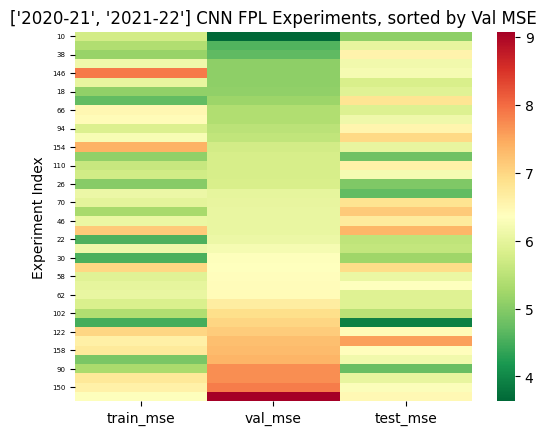


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,...,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features,dataset,pipeline,stratify_by
GK,"['2020-21', '2021-22']",GK,6,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...","b""\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...",skill
DEF,"['2020-21', '2021-22']",DEF,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,b'\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...,b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
MID,"['2020-21', '2021-22']",MID,3,2,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
FWD,"['2020-21', '2021-22']",FWD,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill



['2020-21', '2021-22'] Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse,train_mae,val_mae,test_mae
GK,5.758777,3.636904,5.080052,1.640157,1.115866,1.486512
DEF,6.506676,5.388078,5.874408,1.737131,1.494645,1.646602
MID,6.135582,5.064047,6.164762,1.440681,1.353201,1.395409
FWD,7.885064,5.066278,6.216806,1.808108,1.394910,1.540545



Average Val MSE:
4.788826763629913

Average Test MSE:
5.834007263183594


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,...,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features,dataset,pipeline,stratify_by
GK,"['2020-21', '2021-22']",GK,6,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...","b""\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...",skill
DEF,"['2020-21', '2021-22']",DEF,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,b'\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...,b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
MID,"['2020-21', '2021-22']",MID,3,2,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
FWD,"['2020-21', '2021-22']",FWD,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill


In [58]:
gridsearch_analysis('gridsearch_v11', drop_low_playtime=True, stratify_by='skill', eval_top=1)


 ========= Interesting Model (DROP BENCHWARMERS) ==========


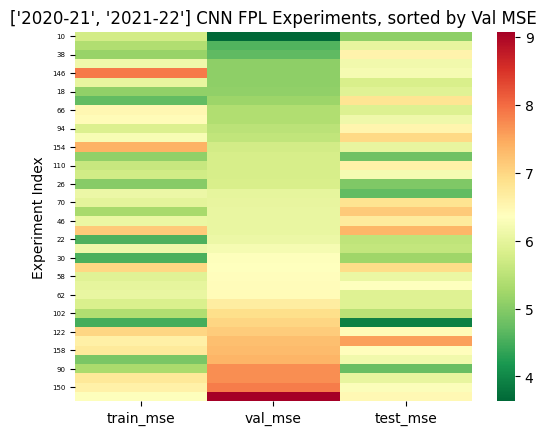


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 1 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,...,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features,dataset,pipeline,stratify_by
GK,"['2020-21', '2021-22']",GK,6,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...","b""\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...",skill
DEF,"['2020-21', '2021-22']",DEF,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,b'\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...,b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
MID,"['2020-21', '2021-22']",MID,3,2,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
FWD,"['2020-21', '2021-22']",FWD,9,1,64,64,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill



['2020-21', '2021-22'] Mean Performance of Top 1 Model by Position


,train_mse,val_mse,test_mse,train_mae,val_mae,test_mae
GK,5.758777,3.636904,5.080052,1.640157,1.115866,1.486512
DEF,6.506676,5.388078,5.874408,1.737131,1.494645,1.646602
MID,6.135582,5.064047,6.164762,1.440681,1.353201,1.395409
FWD,7.885064,5.066278,6.216806,1.808108,1.394910,1.540545



Average Val MSE:
4.788826763629913

Average Test MSE:
5.834007263183594

======= Retraining and Filter Analysis for GK model: =======

X_train shape: (1491, 6, 1)
X_val shape: (600, 6, 1)
X_test shape: (411, 6, 1)
Epoch 159: early stopping
13/13 [==============================] - 0s 412us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 5.053816795349121, Test Mean Absolute Error (MAE): 1.4822200536727905, Test Spearman Correlation: 0.7010200023651123


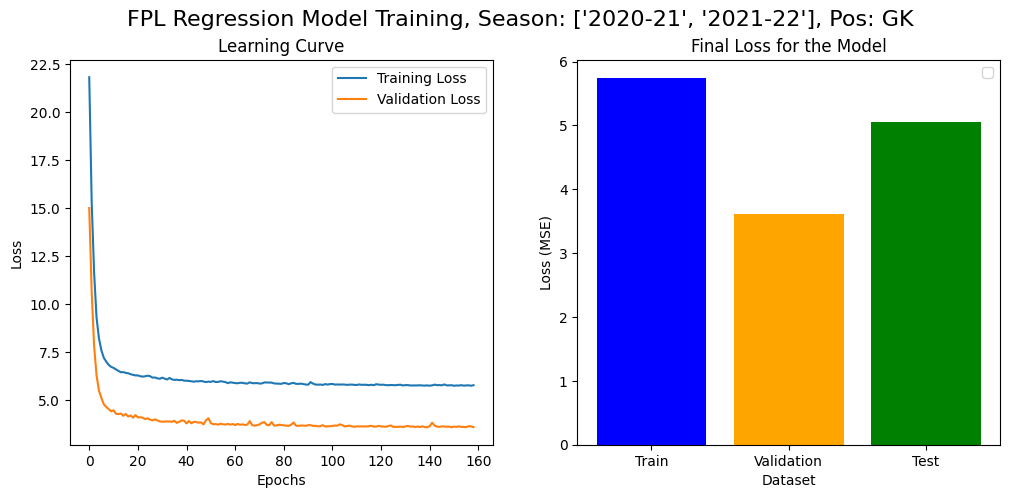

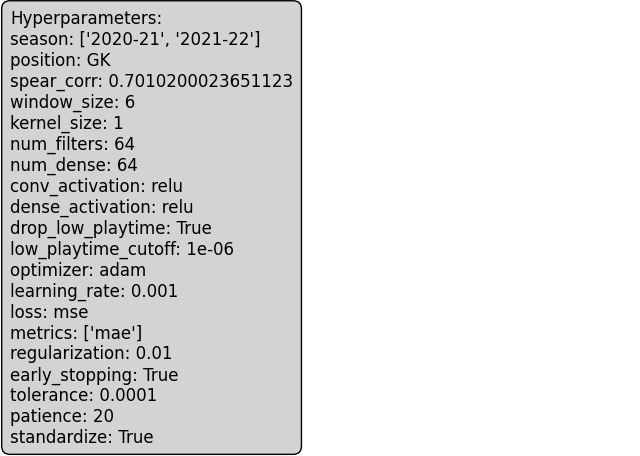

13/13 [==============================] - 0s 444us/step

Worst two examples for GK:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5
33,15,4.336194,113.716768,2.0,1,7,6,2,7,2
361,11,0.754879,104.962507,0.0,0,0,1,2,0,0



Best two examples for GK:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5
257,3,2.969574,0.000926,-2.0,2,6,9,2,2,3
406,2,1.983922,0.000258,0.0,2,1,2,2,1,0


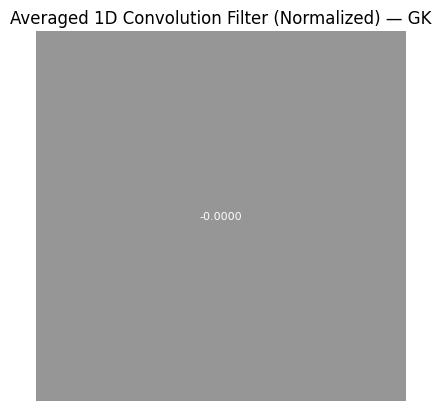


======= Retraining and Filter Analysis for DEF model: =======

X_train shape: (6028, 9, 1)
X_val shape: (2432, 9, 1)
X_test shape: (1619, 9, 1)
Epoch 88: early stopping
51/51 [==============================] - 0s 991us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 5.91108512878418, Test Mean Absolute Error (MAE): 1.6158462762832642, Test Spearman Correlation: 0.5678722858428955


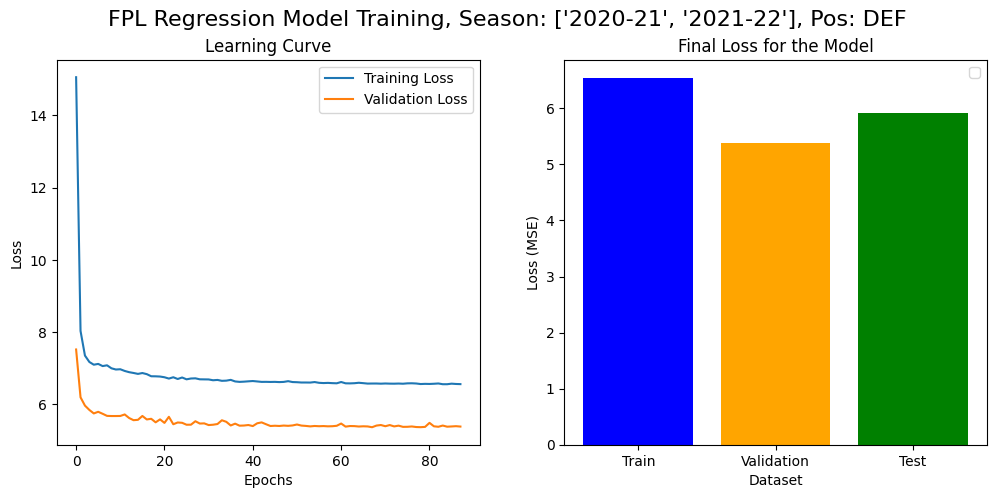

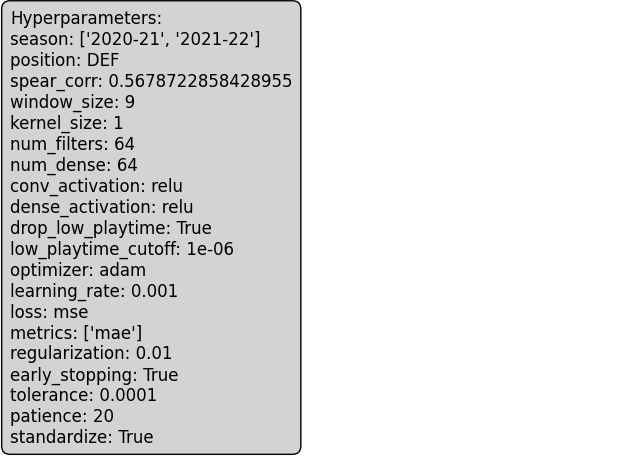

51/51 [==============================] - 0s 2ms/step

Worst two examples for DEF:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5,pts_week6,pts_week7,pts_week8
269,14,0.575971,180.204545,2.0,0,0,0,0,0,0,0,0,0
475,13,0.575971,154.356488,2.0,0,0,0,0,0,0,0,0,0



Best two examples for DEF:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5,pts_week6,pts_week7,pts_week8
1059,2,2.008556,0.000073,1.0,2,9,2,2,6,0,0,0,1
1063,1,0.998597,0.000002,0.0,6,0,0,0,1,2,0,1,0


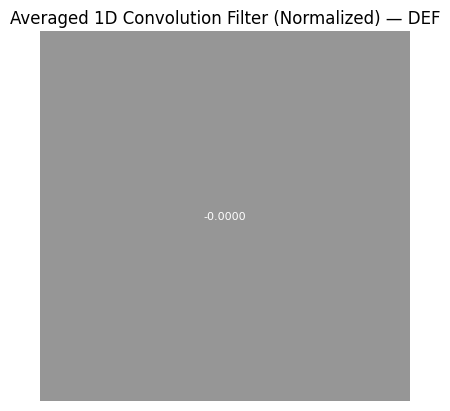


======= Retraining and Filter Analysis for MID model: =======

X_train shape: (8639, 3, 1)
X_val shape: (3462, 3, 1)
X_test shape: (2008, 3, 1)
Epoch 189: early stopping
63/63 [==============================] - 0s 506us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 6.124901294708252, Test Mean Absolute Error (MAE): 1.4113421440124512, Test Spearman Correlation: 0.5827926993370056


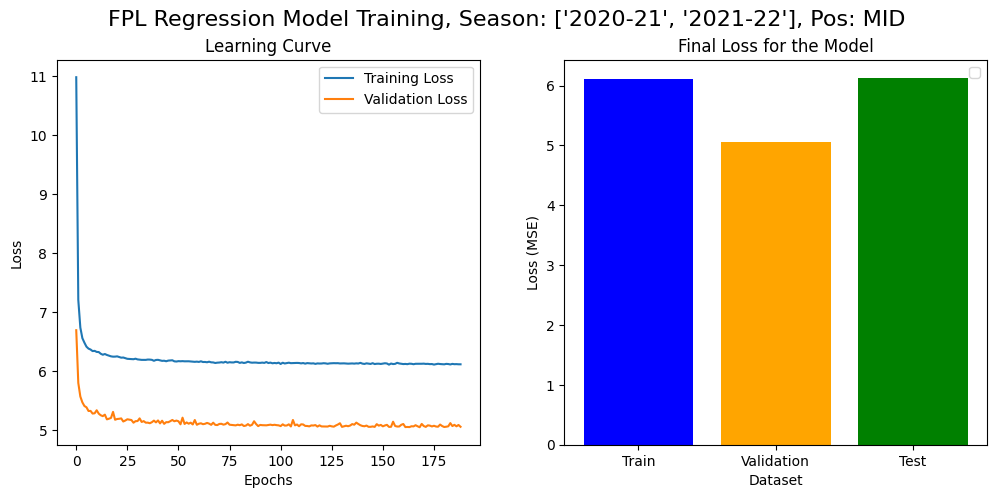

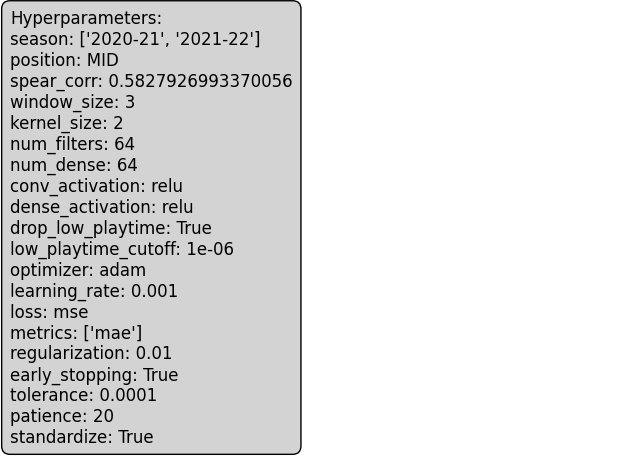

63/63 [==============================] - 0s 534us/step

Worst two examples for MID:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2
96,21,2.200266,353.429994,-2.0,2,3,2
1445,21,4.742748,264.298234,2.0,3,15,12



Best two examples for MID:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2
1029,2,2.008496,0.000072,0.0,3,2,1
1026,3,2.998391,0.000003,0.0,3,3,3


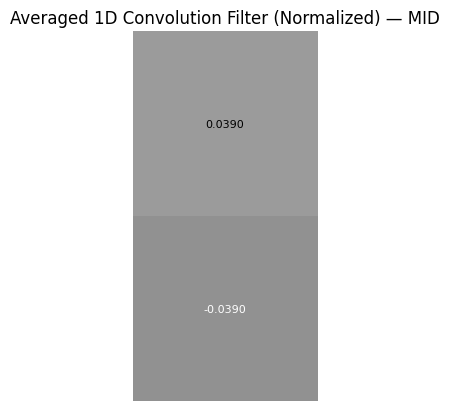


======= Retraining and Filter Analysis for FWD model: =======

X_train shape: (1993, 9, 1)
X_val shape: (894, 9, 1)
X_test shape: (503, 9, 1)
Epoch 78: early stopping
16/16 [==============================] - 0s 547us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test Loss (MSE): 6.304839611053467, Test Mean Absolute Error (MAE): 1.702884554862976, Test Spearman Correlation: 0.6239228248596191


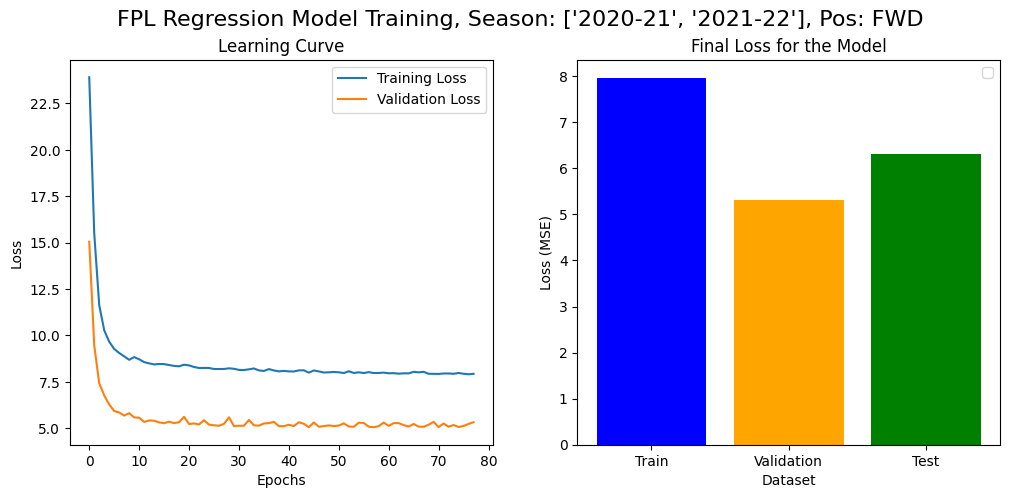

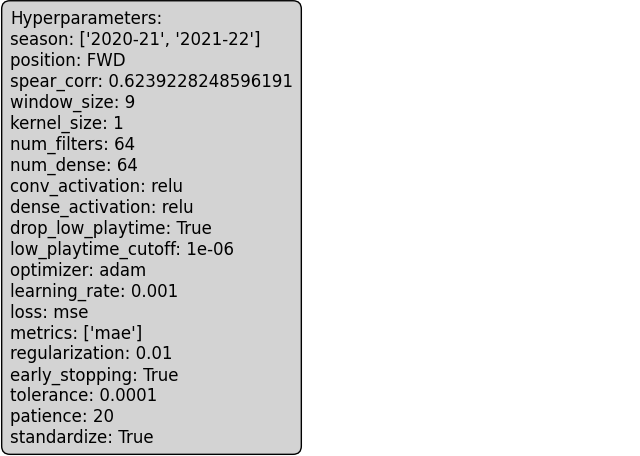

16/16 [==============================] - 0s 725us/step

Worst two examples for FWD:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5,pts_week6,pts_week7,pts_week8
33,20,3.514626,271.767547,-1.0,0,0,1,2,9,8,10,5,2
197,13,1.742208,126.737886,-2.0,8,2,1,1,6,2,0,0,1



Best two examples for FWD:



,Actual Score,Predicted Score,MSE,d_test,pts_week0,pts_week1,pts_week2,pts_week3,pts_week4,pts_week5,pts_week6,pts_week7,pts_week8
60,1,0.973443,0.000705,2.0,0,0,0,0,0,0,0,0,0
106,2,2.003712,0.000014,-1.0,2,2,2,9,2,0,1,1,1


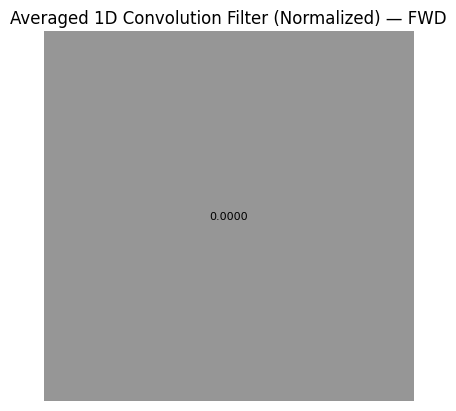

In [59]:
print(f"\n ========= Interesting Model (DROP BENCHWARMERS) ==========")
best_models = investigate_model('gridsearch_v11', drop_low_playtime=True, stratify_by='skill')

In [60]:
#print(f"\n ========= Easier Model (FULL DATA) ==========")
#best_models = investigate_model('gridsearch_v11', drop_low_playtime=False, stratify_by='skill')

## Top 1 and Top 5 Performances

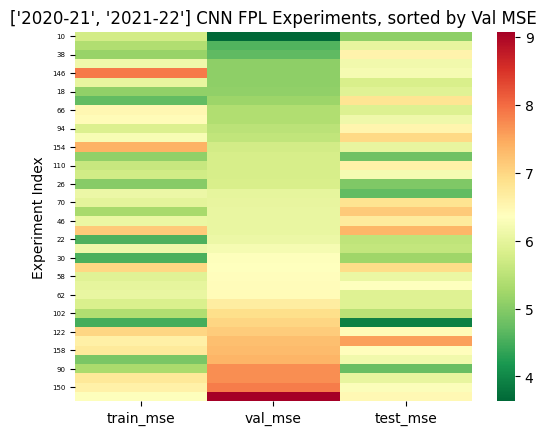


['2020-21', '2021-22'] Mode Best Hyperparameters for Each Position
Via Top 2 Models by Position


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,...,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features,dataset,pipeline,stratify_by
GK,"['2020-21', '2021-22']",GK,3,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95L2\x01\x00\x00\x00\x00\x00}\x94(...","b""\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...",skill
DEF,"['2020-21', '2021-22']",DEF,9.0,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,b'\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...,b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
MID,"['2020-21', '2021-22']",MID,3,2,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
FWD,"['2020-21', '2021-22']",FWD,9.0,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill



['2020-21', '2021-22'] Mean Performance of Top 2 Model by Position


,train_mse,val_mse,test_mse,train_mae,val_mae,test_mae
GK,5.576999,4.107376,5.557086,1.629111,1.223247,1.647345
DEF,6.469422,5.391271,6.008086,1.701942,1.518705,1.606731
MID,6.087723,5.066236,5.992228,1.455705,1.355406,1.439656
FWD,7.635899,5.412219,6.128467,1.777208,1.455428,1.512921



Average Val MSE:
4.994275361299515

Average Test MSE:
5.921466708183289


,season,position,window_size,kernel_size,num_filters,num_dense,conv_activation,dense_activation,drop_low_playtime,low_playtime_cutoff,...,metrics,regularization,early_stopping,tolerance,patience,standardize,amt_num_features,dataset,pipeline,stratify_by
GK,"['2020-21', '2021-22']",GK,3,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95L2\x01\x00\x00\x00\x00\x00}\x94(...","b""\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...",skill
DEF,"['2020-21', '2021-22']",DEF,9.0,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,b'\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...,b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
MID,"['2020-21', '2021-22']",MID,3,2,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill
FWD,"['2020-21', '2021-22']",FWD,9.0,1,64.0,64.0,relu,relu,True,0.000001,...,['mae'],0.01,True,0.0001,20.0,True,ptsonly,"b""\x80\x04\x95\x93\x00\x00\x00\x00\x00\x00\x00...",b'\x80\x04\x95\xcf\x05\x00\x00\x00\x00\x00\x00...,skill


In [61]:
gridsearch_analysis('gridsearch_v11', 
                    stratify_by='skill', 
                    eval_top=2, 
                    drop_low_playtime = True)

In [62]:
def investigate_model_v0(expt_name: str = 'gridsearch', 
                      drop_low_playtime: bool = True,
                      **kwargs):
    """
    Investigate the best model for the given experiment and drop status.

    Retrains the model on the same exact data split (to avoid data leakage), and
    generates learning curves.
    """
    season =  "['2020-21', '2021-22']"
    best_params = gridsearch_analysis(expt_name, 
                        season=season, 
                        eval_top=1,
                        drop_low_playtime=drop_low_playtime,
                        **kwargs)
    
    POSITIONS = ['GK', 'DEF', 'MID', 'FWD']
    best_models = {}
    for position in POSITIONS: 

        print(f"\n======= Retraining and Filter Analysis for {position} model: =======\n")
        # Clean up and consolidate parameters in the 'params' dictionary
        params = best_params.loc[position, :].to_dict()

        serialized_dataset = params.pop('dataset')
        dataset = pickle.loads(ast.literal_eval(serialized_dataset))

        # Retrieve individual datasets
        X_train = dataset['X_train']
        d_train = dataset['d_train']
        y_train = dataset['y_train']
        X_val = dataset['X_val']
        d_val = dataset['d_val']
        y_val = dataset['y_val']
        X_test = dataset['X_test']
        d_test = dataset['d_test']
        y_test = dataset['y_test']

        serialized_pipeline = params.pop('pipeline')
        pipeline = pickle.loads(ast.literal_eval(serialized_pipeline))

        params['season'] = ['2020-21', '2021-22']
        params['metrics'] = ['mae']
        params['num_features'] = NUM_FEATURES_DICT[params['position']][params.pop('amt_num_features')]

        # Add the datasets to params
        params.update({
            'X_train': X_train,
            'd_train': d_train,
            'y_train': y_train,
            'X_val': X_val,
            'd_val': d_val,
            'y_val': y_val,
            'X_test': X_test,
            'd_test': d_test,
            'y_test': y_test,
            'plot': True,
        })

        # =========== Qualitative Analysis of Best & Worst Ex =============

        print(f"X_train shape: {X_train.shape}")
        print(f"X_val shape: {X_val.shape}")
        print(f"X_test shape: {X_test.shape}")

        model, expt_res = build_train_cnn(**params)
        best_models[position] = model

        y_pred = model.predict([X_test, d_test])
        y_test_flattened = y_test.flatten()
        y_pred_flattened = y_pred.flatten()
        mse_per_example = np.square(y_test_flattened - y_pred_flattened)

        results_df = pd.DataFrame({'Actual Score': y_test_flattened, 'Predicted Score': y_pred_flattened, 'MSE': mse_per_example})
        results_df['d_test'] = d_test

        # Add X_test features to the DataFrame
        # unstandardize the features
        X_test_original = X_test.copy()

        # Calculate unstandardized pts
        numerical_transformer = pipeline.named_steps['preprocessor'].named_transformers_['num']
        X_test_reshaped = X_test_original.reshape(-1, X_test_original.shape[-1])
        X_test_unstandardized = numerical_transformer.inverse_transform(X_test_reshaped).astype(int)
        X_test_unstandardized = X_test_unstandardized.reshape(X_test_original.shape)
        X_test_unstandardized_2d = X_test_unstandardized.reshape(X_test_unstandardized.shape[0], -1)
        column_names = [f'pts_week{i}' for i in range(X_test_unstandardized.shape[1])]
        unstandardized_df = pd.DataFrame(X_test_unstandardized_2d, columns=column_names)

        results_df = pd.concat([results_df, unstandardized_df], axis=1)

        results_df.sort_values(by='MSE', ascending=False, inplace=True)

        print(f"\nWorst two examples for {position}:\n")
        display(results_df.head(2))

        print(f"\nBest two examples for {position}:\n")
        display(results_df.tail(2))


        for layer in model.layers:
            if 'conv' not in layer.name:
                continue
            filters, biases = layer.get_weights()

        # retrieve filter weights from the second hidden layer
        filters, biases = model.layers[1].get_weights()

        # normalize filter values by z-score normalization
        mean_value, std_dev = filters.mean(), filters.std()
        normalized_filters = (filters - mean_value) / std_dev
        mean_filter = normalized_filters.mean(axis=-1)

        # set greyscale color map
        cmap = plt.cm.Greys_r
        cmap.set_bad('0.5')  # Set the color for NaN values (if any) to medium-grey

        # plot the normalized average filter with numeric values inside pixels
        fig, ax = plt.subplots()
        img = ax.imshow(mean_filter, cmap=cmap, vmin=-1, vmax=1)

        # add text annotations with normalized values inside each pixel
        for i, value in enumerate(mean_filter):
            value = value[0]
            # set text color based on brightness
            text_color = 'white' if value < 0 else 'black'
            ax.text(0, i, f"{value:.4f}", ha='center', va='center', fontsize=8, color=text_color)
        ax.set_title("Averaged 1D Convolution Filter (Normalized)")
        ax.axis('off')
        plt.show()

    return best_models

## V10

In [63]:
# easier model
#best_models = investigate_model_v0('gridsearch_v10', drop_low_playtime=False)

## DROP model

In [64]:
# model with drop benched players
#best_models = investigate_model_v0('gridsearch_v10', drop_low_playtime=True)

## V9

In [65]:
#best_models = investigate_model_v0('gridsearch_v9', drop_low_playtime=True)

## V8

In [66]:
# with player dropping
"""
best_params = gridsearch_analysis('gridsearch_v8', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    drop_low_playtime = True)
"""

'\nbest_params = gridsearch_analysis(\'gridsearch_v8\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1,\n                    drop_low_playtime = True)\n'

In [67]:
# with player dropping
"""
best_hyperparams = gridsearch_analysis('gridsearch_v8', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    drop_low_playtime = False)
"""

'\nbest_hyperparams = gridsearch_analysis(\'gridsearch_v8\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1,\n                    drop_low_playtime = False)\n'

## V7


In [68]:
# with player dropping
"""
gridsearch_analysis('gridsearch_v7', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    drop_low_playtime = True)
"""

'\ngridsearch_analysis(\'gridsearch_v7\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1,\n                    drop_low_playtime = True)\n'

In [69]:
# without player dropping
"""
gridsearch_analysis('gridsearch_v7', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    drop_low_playtime = False)
"""

'\ngridsearch_analysis(\'gridsearch_v7\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1,\n                    drop_low_playtime = False)\n'

## V6  With Player Dropping

In [70]:
"""
gridsearch_analysis('gridsearch_v6', 
                    season="['2020-21', '2021-22']", 
                    eval_top=5,
                    drop_low_playtime = True)
"""

'\ngridsearch_analysis(\'gridsearch_v6\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=5,\n                    drop_low_playtime = True)\n'

## V6 Best Models Without Player Dropping

In [71]:
"""gridsearch_analysis('gridsearch_v6', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1,
                    num_dense=64,
                    num_filters=64,
                    amt_num_features = 'ptsonly',
                    drop_low_playtime = True)"""

'gridsearch_analysis(\'gridsearch_v6\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1,\n                    num_dense=64,\n                    num_filters=64,\n                    amt_num_features = \'ptsonly\',\n                    drop_low_playtime = True)'

## Other Models

In [72]:
"""gridsearch_analysis('_gridsearch_v4', 
                    season="['2020-21', '2021-22']", 
                    eval_top=1)"""

'gridsearch_analysis(\'_gridsearch_v4\', \n                    season="[\'2020-21\', \'2021-22\']", \n                    eval_top=1)'

In [73]:
"""gridsearch_analysis('gridsearch_v4_singleyear_drop', 
                    season='2020-21',
                    eval_top=1)"""

"gridsearch_analysis('gridsearch_v4_singleyear_drop', \n                    season='2020-21',\n                    eval_top=1)"

In [74]:
"""gridsearch_analysis('gridsearch_v4_singleyear_drop', 
                    season='2021-22',
                    eval_top=1)"""

"gridsearch_analysis('gridsearch_v4_singleyear_drop', \n                    season='2021-22',\n                    eval_top=1)"

In [75]:
"""gridsearch_analysis('gridsearch_v5', eval_top=3)"""

"gridsearch_analysis('gridsearch_v5', eval_top=3)"

In [76]:
"""best_hyperparams = gridsearch_analysis('gridsearch_v4_optimal_drop', 
                    eval_top=1)"""

"best_hyperparams = gridsearch_analysis('gridsearch_v4_optimal_drop', \n                    eval_top=1)"